In [1]:
import pandas as pd
df= pd.read_csv("train.csv").applymap(lambda x: x.lower() if type(x) == str else x)
dftest=pd.read_csv("test.csv").applymap(lambda x: x.lower() if type(x) == str else x)



In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,class
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,0,unknown,no


1) in first look there is no missing values in the dataframe but need to check all of the data frame
2) probbly there is some NUMERIC column (age,balance,day,duration,campaign,previous)
3) 

In [3]:
df.shape 

(42180, 16)

looks like there is 16 column and 42180 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42180 entries, 0 to 42179
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        42180 non-null  int64  
 1   job        42180 non-null  object 
 2   marital    42180 non-null  object 
 3   education  42178 non-null  object 
 4   default    42180 non-null  object 
 5   balance    42175 non-null  float64
 6   housing    42177 non-null  object 
 7   loan       42179 non-null  object 
 8   contact    42173 non-null  object 
 9   day        42180 non-null  int64  
 10  month      42180 non-null  object 
 11  duration   42169 non-null  float64
 12  campaign   42180 non-null  int64  
 13  previous   42180 non-null  int64  
 14  poutcome   42180 non-null  object 
 15  class      42180 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 5.1+ MB


1) Out of 16 columns, only 10 columns have complete data.
2) not alot of data are missing

# Looking at the percentage of missing values per column

there is 29 missing values.

In [10]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/42180)*100})
missing_data

,total_missing,perc_missing
age,0,0.000000
job,0,0.000000
marital,0,0.000000
education,2,0.004742
default,0,0.000000
balance,5,0.011854
housing,3,0.007112
loan,1,0.002371
contact,7,0.016596
day,0,0.000000


Statistical description of numerical variables

In [6]:
df.describe()

,age,balance,day,duration,campaign,previous
count,42180.000000,42175.000000,42180.000000,42169.000000,42180.000000,42180.000000
mean,40.739379,1321.708880,15.864391,255.429273,2.824941,0.450403
std,10.097570,2984.706622,8.303157,258.178684,3.175839,2.143422
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,61.000000,8.000000,101.000000,1.000000,0.000000
50%,39.000000,425.000000,16.000000,176.000000,2.000000,0.000000
75%,48.000000,1369.500000,21.000000,314.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


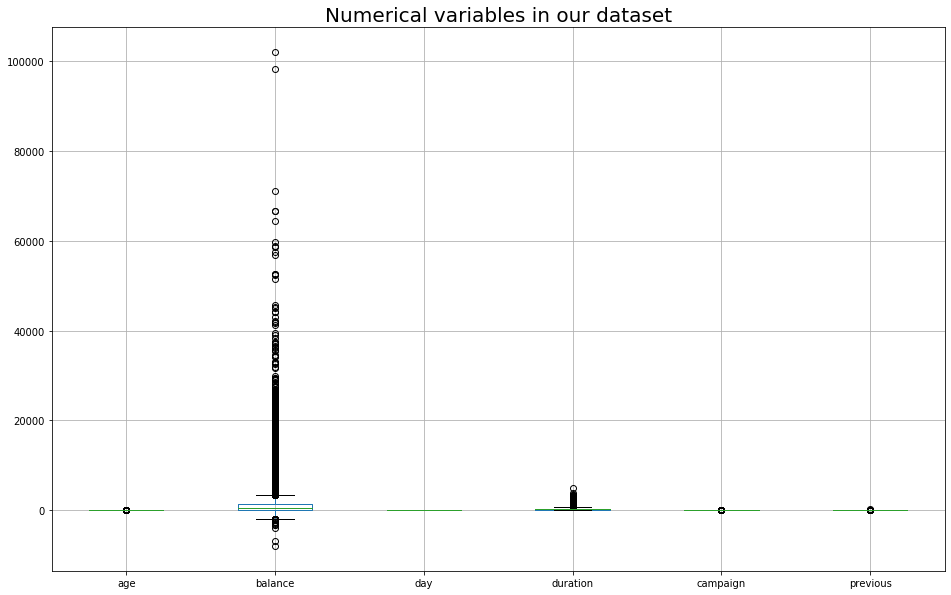

In [7]:
from matplotlib import pyplot as plt
num_cols = ['age','balance','day','duration','campaign','previous']
plt.figure(figsize=(16,10))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataset", fontsize=20)
plt.show()

As we see on boxplot, there is a huge interval between balance values.
But the biggest accumulation of values varies between 0 and 3000.
Also there could be negative values.